<a href="https://colab.research.google.com/github/xmfaizan/pizza-vs-icecream-classif/blob/main/pizza_v_icecream_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !mkdir -p ~/.kaggle
 !cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d hemendrasr/pizza-vs-ice-cream

Dataset URL: https://www.kaggle.com/datasets/hemendrasr/pizza-vs-ice-cream
License(s): other
 91% 38.0M/41.7M [00:01<00:00, 24.2MB/s]
100% 41.7M/41.7M [00:01<00:00, 22.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/pizza-vs-ice-cream.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [133]:
#generators
trained_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    image_size = (256,256)
)

valid_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/test' ,
    labels = 'inferred' ,
    label_mode = 'int' ,
    image_size = (256,256)
)

Found 718 files belonging to 2 classes.
Found 106 files belonging to 2 classes.


In [134]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

trained_ds = trained_ds.map(process)
valid_ds = valid_ds.map(process)

In [135]:
#CNN Model

In [136]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [137]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 30, 30, 128)      

In [138]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [156]:
res = model.fit(trained_ds,epochs=5,validation_data=valid_ds)

Epoch 1/5
23/23 [==============================] - 2s 80ms/step - loss: 0.0379 - accuracy: 0.9875 - val_loss: 0.2005 - val_accuracy: 0.9245
Epoch 2/5
23/23 [==============================] - 2s 84ms/step - loss: 0.0106 - accuracy: 0.9986 - val_loss: 0.2245 - val_accuracy: 0.8962
Epoch 3/5
23/23 [==============================] - 2s 81ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.3998 - val_accuracy: 0.9057
Epoch 4/5
23/23 [==============================] - 3s 100ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.4776 - val_accuracy: 0.9245
Epoch 5/5
23/23 [==============================] - 3s 92ms/step - loss: 8.1714e-04 - accuracy: 1.0000 - val_loss: 0.2600 - val_accuracy: 0.9245


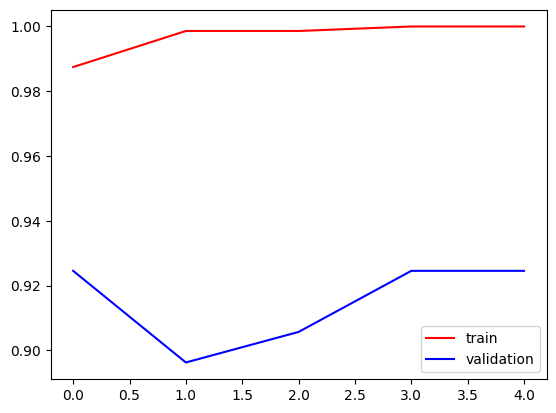

In [157]:
import matplotlib.pyplot as plt

plt.plot(res.history['accuracy'],color='red',label='train')
plt.plot(res.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

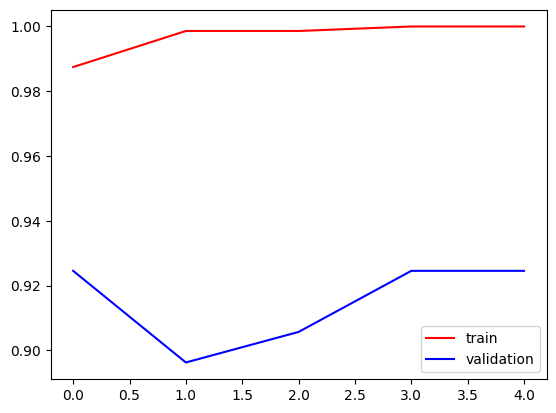

In [158]:
plt.plot(res.history['accuracy'],color='red',label='train')
plt.plot(res.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [159]:
# Ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [160]:
import cv2

In [161]:
test_img = cv2.imread('/content/pizza.jpeg')

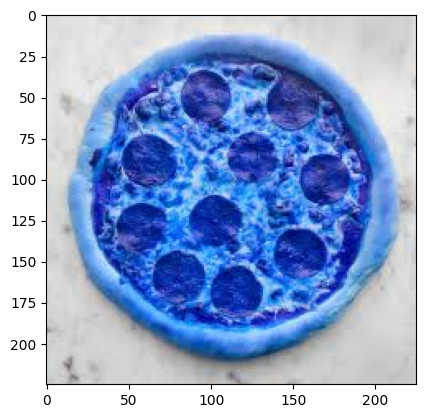

In [162]:
plt.imshow(test_img)

In [163]:
test_img.shape

(225, 225, 3)

In [164]:
test_img = cv2.resize(test_img,(256,256))

In [165]:
test_inp = test_img.reshape((1,256,256,3))

In [166]:
model.predict(test_inp)

1/1 [==============================] - 0s 24ms/step


array([[0.]], dtype=float32)

In [167]:
#Pizza=0 and IceCream=1

In [168]:
test_img_2 = cv2.imread('/content/ice-cream.jpg')

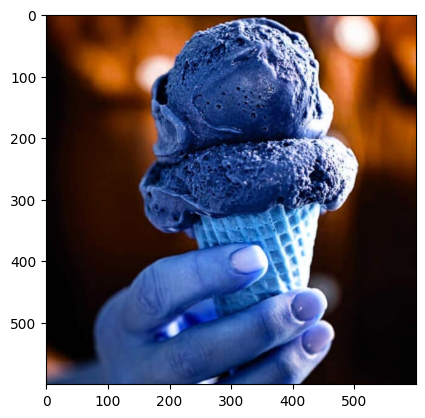

In [169]:
plt.imshow(test_img_2)

In [170]:
test_img_2.shape

(600, 600, 3)

In [171]:
test_img_2 = cv2.resize(test_img,(256,256))

In [172]:
test_inp_2 = test_img_2.reshape((1,256,256,3))

In [173]:
model.predict(test_inp_2)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)